<a href="https://colab.research.google.com/github/RH00000/UH_RTS_Research_ML/blob/main/MLP_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
SEED_VALUE = 7
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = mnist.load_data()

x_valid = x_train_all[:10000]
x_train = x_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


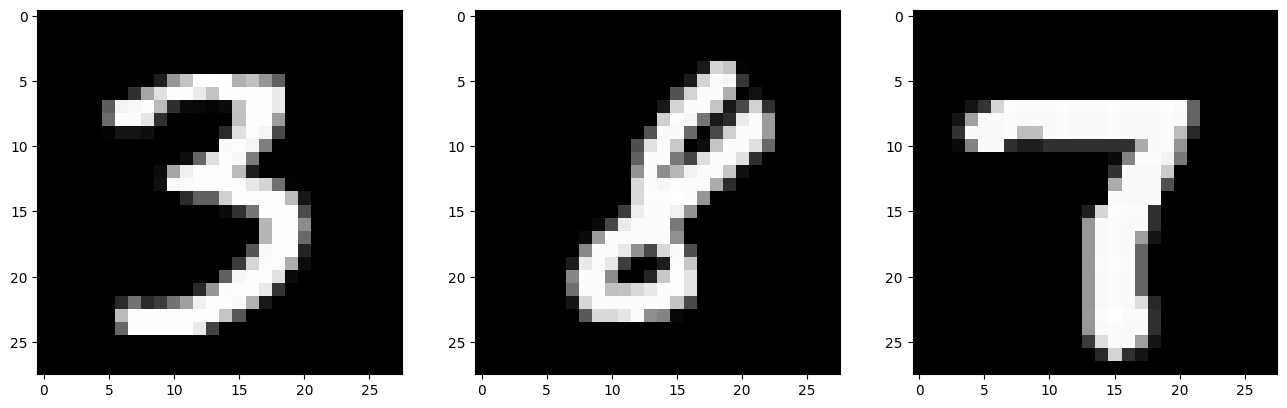

In [ ]:
plt.figure(figsize=(16,5))
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.axis(True)
  plt.imshow(x_train[i], cmap='grey')
  plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [ ]:
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((x_test.shape[0], 28*28))
x_test = x_test.astype("float32") / 255

x_valid = x_valid.reshape((x_valid.shape[0], 28*28))
x_valid = x_valid.astype("float32") / 255

In [ ]:
# load fashion MNIST dataset
# ((x_train_fashion, y_train_fashion), (_, _)) = fashion_mnist.load_data()

# print(y_train_fashion[0:9])

[9 0 0 3 0 2 7 2 5]


In [ ]:
# y_train_onehot = to_categorical(y_train_fashion[0:9])
# print(y_train_onehot)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#Convert integer labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test = to_categorical(y_test)

print(y_train[0:9])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
#Instantiate the model
model = tf.keras.Sequential()

#Build the model
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Display the summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
training_results = model.fit(x_train,
                             y_train,
                             epochs=21,
                             batch_size=64,
                             validation_data=(x_valid,y_valid))

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8628 - loss: 0.4765 - val_accuracy: 0.9538 - val_loss: 0.1530
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9593 - loss: 0.1349 - val_accuracy: 0.9651 - val_loss: 0.1193
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9737 - loss: 0.0893 - val_accuracy: 0.9695 - val_loss: 0.1100
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9801 - loss: 0.0660 - val_accuracy: 0.9711 - val_loss: 0.1104
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9863 - loss: 0.0495 - val_accuracy: 0.9722 - val_loss: 0.1083
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9891 - loss: 0.0384 - val_accuracy: 0.9730 - val_loss: 0.1102
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9912 - loss: 0.0296 - val_accuracy: 0.9745 - val_loss: 0.1158
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9933 - loss: 0.0223 - val_accuracy: 0.

In [ ]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
  fig, ax = plt.subplots(figsize=(15,4))

  if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
    metrics = [metrics,]
    metric_name = [metric_name,]

  for idx, metric in enumerate(metrics):
    ax.plot(metric, color=color[idx])

  plt.xlabel('Epoch')
  plt.ylabel(ylabel)
  plt.title(title)
  plt.xlim([0,21])
  plt.ylim(ylim)

  #tailor x-axis tickmarks
  ax.xaxis.set_major_locator(MultipleLocator(5))
  ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
  ax.xaxis.set_minor_locator(MultipleLocator(1))
  plt.grid(True)
  plt.legend(metric_name)
  plt.show()
  plt.close()

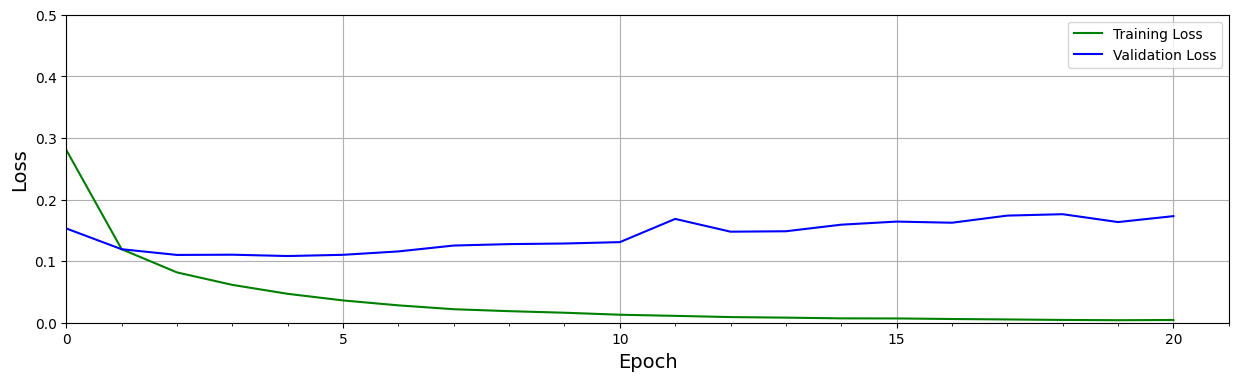

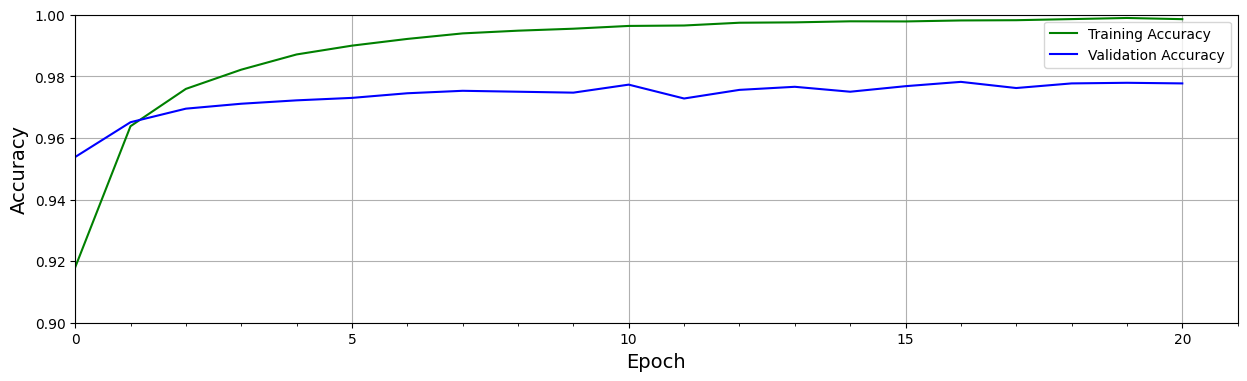

In [ ]:
#Retrieve training results
train_loss = training_results.history['loss']
train_acc = training_results.history['accuracy']
valid_loss = training_results.history['val_loss']
valid_acc = training_results.history['val_accuracy']

plot_results([train_loss, valid_loss],
             ylabel='Loss',
             ylim=[0.0, 0.5],
             metric_name=['Training Loss', 'Validation Loss'],
             color=['g', 'b'])

plot_results([train_acc, valid_acc],
             ylabel='Accuracy',
             ylim=[0.9,1.0],
             metric_name=['Training Accuracy', 'Validation Accuracy'],
             color=['g', 'b'])

In [ ]:
predictions = model.predict(x_test)
index = 9999 #up to 9999
print('Ground truth for test digit', y_test[index])
print('\n')
print('Predictions for each class:\n')
for i in range(10):
  print('digit:', i, ' probability: ', predictions[index][i])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Ground truth for test digit [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Predictions for each class:

digit: 0  probability:  2.741023e-30
digit: 1  probability:  1.1075758e-28
digit: 2  probability:  1.831669e-24
digit: 3  probability:  3.722788e-36
digit: 4  probability:  3.503049e-18
digit: 5  probability:  4.277172e-24
digit: 6  probability:  0.99999994
digit: 7  probability:  0.0
digit: 8  probability:  1.2896624e-35
digit: 9  probability:  4.7202945e-32


In [ ]:
#Generate predictions for the test dataset
predictions = model.predict(x_test)

#For each sample image in the test dataset, select the class label with the highest probability
predicted_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


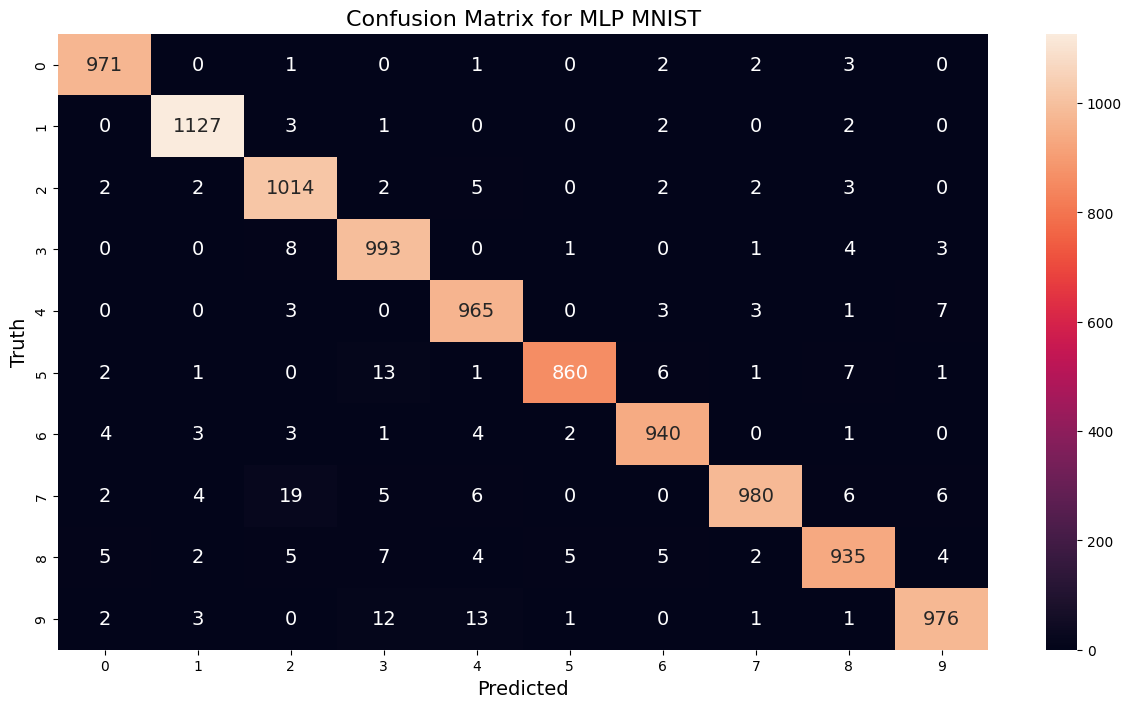

In [ ]:
#Convert one-hot encoded labels to integers
y_test_integer_labels = tf.argmax(y_test, axis=1)

#Generate a confusion matrix for the test dataset
cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

#Plot the confusion matrix as a hearmap
plt.figure(figsize=[15,8])
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d', annot_kws={'size':14})
plt.title('Confusion Matrix for MLP MNIST')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()